# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

El data set que vamos a ver es de un Banco en Portugal

El Banco portugués está teniendo una baja en sus ingresos. 
El Banco quiere predecir qué clientes tienen más probabilidades de suscribir un depósito a plazo y tratar de concentrar sus fuerzas en poder captar ese tipo de clientes.

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [42]:
df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', delimiter=';')

In [43]:
df_raw.to_csv('../data/raw/dataset_bank.csv')

In [44]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

En este listado vemos que hay 21 columnas, de las cuales 11 columnas son categoricas y 10 numericas.
Nuestra vriable objetivo es y , esta es categorica.
Vemos que no hay valores Nan.

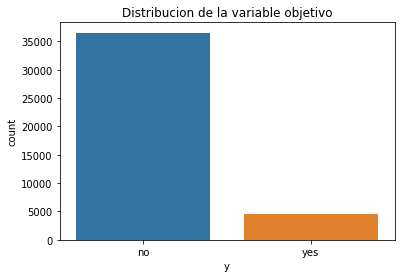

In [45]:
# Vamos a ver como se distribuye nuestra variable objetivo

sns.countplot(x=df_raw['y'], data=df_raw)
plt.title('Distribucion de la variable objetivo')
plt.show()

In [46]:
cta_no=36548/41188*100
cta_si=4640/41188*100
print("Porcentaje que NO : {:.2f} %".format(cta_no))
print("Porcentaje que SI : {:.2f} %".format(cta_si))

Porcentaje que NO : 88.73 %
Porcentaje que SI : 11.27 %


Podemos ver que estan desequilibrados, la mayoria esta en la clase cuya respuesta es no.

In [47]:
"""
Age (numerical)
Job: Type of Job (categorical)
Marital: marital status (categorical)
Education: (categorical)
Default: has credit in default? (categorical)
Housing: has housing loan? (categorical)
Loan: has personal loan? (categorical)
contact: contact communication type (categorcial)
month: last contact month of year (categorical)
day_of_week: last contact day of the week (categorical)
duration: last contact duration, in seconds (numerical)
Important note: this output highly affects the output target (if duration = 0, then y = 'no'). Yet, the duration is not known before a call is performed. Also, after the end of the call, y is obviously known. Consider if you should include it or not for a realistic predictive model.
campaign: number of contacts performed during this campaign and for this client (numerical)
pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
previous: number of contacts performed before this campaign and for this client (numerical)
poutcome: outcome of the previous marketing campaign (categorical)
Important note: this attribute has three categories: 'failure', 'success' and 'non-existent'. 86% of the data falls into 'non-existent' category.
emp.var.rate: employment variation rate - quarterly indicator (numeric)
cons.price.idx: consumer price index- monthly indicator (numeric)
cons.conf.idx: consumer confidence index - monthly indicator (numeric)
euribor3m: euribor 3 month rate: - daily indicator(numeric)
nr.employed: number of employees - quarterly indicator (numeric)
Target variable:
y: has the client subscribed a term deposit?
"""

"\nAge (numerical)\nJob: Type of Job (categorical)\nMarital: marital status (categorical)\nEducation: (categorical)\nDefault: has credit in default? (categorical)\nHousing: has housing loan? (categorical)\nLoan: has personal loan? (categorical)\ncontact: contact communication type (categorcial)\nmonth: last contact month of year (categorical)\nday_of_week: last contact day of the week (categorical)\nduration: last contact duration, in seconds (numerical)\nImportant note: this output highly affects the output target (if duration = 0, then y = 'no'). Yet, the duration is not known before a call is performed. Also, after the end of the call, y is obviously known. Consider if you should include it or not for a realistic predictive model.\ncampaign: number of contacts performed during this campaign and for this client (numerical)\npdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)\nprevio

In [48]:
#Removing duplicates

duplicated_data=df_raw[df_raw.duplicated(keep="last")]
print("Duplicated Data",duplicated_data.shape)
df_raw=df_raw.drop_duplicates()
df_raw.shape

Duplicated Data (12, 21)


(41176, 21)

Vamos a tomar un dataset con los valores que son nuestro objetivo, en este caso la y
Lo vamos a separar para la exploracion del dataset original

In [49]:
objetivo = df_raw.y
df_raw_2 = df_raw.drop('y', axis=1)

In [50]:
cat_cols = df_raw_2.select_dtypes('object').columns
num_cols = df_raw_2.select_dtypes(['int', 'float']).columns
print("las columnas categoricas son",cat_cols)
print("las columnas numericas son",num_cols)

las columnas categoricas son Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')
las columnas numericas son Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [51]:
# Hacemos una funcion para listar las columnas que contienen unknow

def verValueCounts(df,col):
    print("Value counts de {}".format(col))
    print(df[col].value_counts())
    print("="*60)

In [52]:
# Voy a recorrer la lista de las columnas categoricas que continen unknow y los vamos a listar
lista=['job','marital','education','default','housing','loan']
for i in lista:
    verValueCounts(df_raw_2,i)


Value counts de job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
Value counts de marital
married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64
Value counts de education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64
Value counts de default
no         32577
unknown     8596
yes            3
Name: default, dtype: int64
Value counts de housing
yes        21571
no         18615
unknown      990
Name: housing, dtype: int64
Value counts de loan
no         33938
yes         6248
unknown

In [53]:
df_raw[df_raw['education']=='illiterate'][['education','y']]

,education,y
5393,illiterate,no
6928,illiterate,no
12383,illiterate,no
14445,illiterate,no
14486,illiterate,no
16269,illiterate,no
17739,illiterate,no
22402,illiterate,no
22642,illiterate,no
26680,illiterate,no


In [54]:
df_raw[df_raw['education']=='unknown'][['education','y']]

,education,y
7,unknown,no
10,unknown,no
26,unknown,no
30,unknown,no
31,unknown,no
...,...,...
41118,unknown,no
41120,unknown,no
41122,unknown,yes
41135,unknown,no


In [55]:
df_raw_2['contact'].value_counts()

cellular     26135
telephone    15041
Name: contact, dtype: int64

In [56]:
df_raw_2['month'].value_counts()

may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [57]:
df_raw_2['day_of_week'].value_counts()

thu    8618
mon    8512
wed    8134
tue    8086
fri    7826
Name: day_of_week, dtype: int64

In [58]:
df_raw_2['poutcome'].value_counts()

nonexistent    35551
failure         4252
success         1373
Name: poutcome, dtype: int64

In [59]:
# Funcion para convertir los valores unknow por el valor mas frecuente de esa variable

def repl_with_freq(df,col):
    freq = df[col].value_counts().idxmax()
    print("El valor maximo de frecuencia es:", freq)
    df[col].replace('unknown', freq , inplace = True)
    print("Se remplazo el valor unknown por el que tiene mas valores:", freq)

In [60]:
for i in lista:
    repl_with_freq(df_raw_2,i)
    print("="*65)

El valor maximo de frecuencia es: admin.
Se remplazo el valor unknown por el que tiene mas valores: admin.
El valor maximo de frecuencia es: married
Se remplazo el valor unknown por el que tiene mas valores: married
El valor maximo de frecuencia es: university.degree
Se remplazo el valor unknown por el que tiene mas valores: university.degree
El valor maximo de frecuencia es: no
Se remplazo el valor unknown por el que tiene mas valores: no
El valor maximo de frecuencia es: yes
Se remplazo el valor unknown por el que tiene mas valores: yes
El valor maximo de frecuencia es: no
Se remplazo el valor unknown por el que tiene mas valores: no


In [61]:
# Verificamos que se halla cambiado correctamente los valores
for i in lista:
    verValueCounts(df_raw_2,i)

Value counts de job
admin.           10749
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64
Value counts de marital
married     25001
single      11564
divorced     4611
Name: marital, dtype: int64
Value counts de education
university.degree      13894
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
illiterate                18
Name: education, dtype: int64
Value counts de default
no     41173
yes        3
Name: default, dtype: int64
Value counts de housing
yes    22561
no     18615
Name: housing, dtype: int64
Value counts de loan
no     34928
yes     6248
Name: loan, dtype: int64


In [62]:
lst=['basic.9y','basic.6y','basic.4y']
for i in lst:
    df_raw_2.loc[df_raw_2['education'] == i, 'education'] = "middle.school"

df_raw_2['education'].value_counts()

university.degree      13894
middle.school          12512
high.school             9512
professional.course     5240
illiterate                18
Name: education, dtype: int64

In [63]:
objetivo = objetivo.replace('no',0)
objetivo = objetivo.replace('yes',1)


In [64]:
objetivo

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41176, dtype: int64

In [65]:
df_raw_2['age']

0        56
1        57
2        37
3        40
4        56
         ..
41183    73
41184    46
41185    56
41186    44
41187    74
Name: age, Length: 41176, dtype: int64

In [66]:
rangos=[10,20,30,40,50,60,70,80,90,100]
categorias=[0,1,2,3,4,5,6,7,8]
# son 9 rangos
df_raw_2['age']=pd.cut(df_raw_2['age'],bins=rangos,labels=categorias)

In [67]:
df_raw_2['age']

0        4
1        4
2        2
3        2
4        4
        ..
41183    6
41184    3
41185    4
41186    3
41187    6
Name: age, Length: 41176, dtype: category
Categories (9, int64): [0 < 1 < 2 < 3 ... 5 < 6 < 7 < 8]

In [68]:
cat_cols = df_raw_2.select_dtypes('object').columns
num_cols = df_raw_2.select_dtypes(['int', 'float']).columns
print("las columnas categoricas son",cat_cols)
print("las columnas numericas son",num_cols)

las columnas categoricas son Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')
las columnas numericas son Index(['duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [69]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [70]:
df_raw_2['education'] = encoder.fit_transform(df_raw_2['education'])

In [71]:
df_raw_2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,4,housemaid,married,2,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,4,services,married,0,no,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,2,services,married,0,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,2,admin.,married,2,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,4,services,married,0,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [72]:
df_raw_2['education'].value_counts()

4    13894
2    12512
0     9512
3     5240
1       18
Name: education, dtype: int64

In [73]:
month_dict={'may':5,'jul':7,'aug':8,'jun':6,'nov':11,'apr':4,'oct':10,'sep':9,'mar':3,'dec':12}
df_raw_2['month']= df_raw_2['month'].map(month_dict) 

day_dict={'thu':5,'mon':2,'wed':4,'tue':3,'fri':6}
df_raw_2['day_of_week']= df_raw_2['day_of_week'].map(day_dict) 

In [74]:
df_raw_2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,4,housemaid,married,2,no,no,no,telephone,5,2,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,4,services,married,0,no,no,no,telephone,5,2,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,2,services,married,0,no,yes,no,telephone,5,2,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,2,admin.,married,2,no,no,no,telephone,5,2,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,4,services,married,0,no,no,yes,telephone,5,2,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [75]:
df_raw_2 = pd.get_dummies(df_raw_2, columns = ['job', 'marital', 'default','housing', 'loan', 'contact', 'poutcome'])
df_raw_2.head()

,age,education,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,4,2,5,2,261,1,999,0,1.1,93.994,...,0,1,0,1,0,0,1,0,1,0
1,4,0,5,2,149,1,999,0,1.1,93.994,...,0,1,0,1,0,0,1,0,1,0
2,2,0,5,2,226,1,999,0,1.1,93.994,...,0,0,1,1,0,0,1,0,1,0
3,2,2,5,2,151,1,999,0,1.1,93.994,...,0,1,0,1,0,0,1,0,1,0
4,4,0,5,2,307,1,999,0,1.1,93.994,...,0,1,0,0,1,0,1,0,1,0


In [76]:
df_raw_2 = df_raw_2.drop(['default_no','housing_no','loan_no'],axis=1)

In [77]:
df_raw_2.columns

Index(['age', 'education', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'default_yes', 'housing_yes', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [78]:
cat_cols = df_raw_2.select_dtypes('object').columns
num_cols = df_raw_2.select_dtypes(['int', 'float']).columns
print("las columnas categoricas son",cat_cols)
print("las columnas numericas son",num_cols)

las columnas categoricas son Index([], dtype='object')
las columnas numericas son Index(['education', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object')


In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_raw_2, objetivo, test_size=0.3, random_state=42)

In [85]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [90]:
# Fijarse los hiperparametros que pueda mejorar la regresion logistica
pipe_lr = make_pipeline(StandardScaler(), LogisticRegression())
pipe_lr.fit(X_train, y_train)  # apply scaling on training data
pipe_lr.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

0.9068242532178418

In [91]:
from sklearn.metrics import classification_report
target_names=['clase:no','clase:yes']
y_true=y_test
y_pred=pipe_lr.predict(X_test)
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    clase:no       0.93      0.97      0.95     10929
   clase:yes       0.66      0.40      0.49      1424

    accuracy                           0.91     12353
   macro avg       0.79      0.68      0.72     12353
weighted avg       0.89      0.91      0.90     12353



In [96]:
pipe_lr = make_pipeline(StandardScaler(), LogisticRegression(class_weight={0:0.3,1:0.7}))
pipe_lr.fit(X_train, y_train)  # apply scaling on training data
pipe_lr.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

0.9053671172994414

In [97]:
target_names=['clase:no','clase:yes']
y_true=y_test
y_pred=pipe_lr.predict(X_test)
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    clase:no       0.95      0.94      0.95     10929
   clase:yes       0.58      0.62      0.60      1424

    accuracy                           0.91     12353
   macro avg       0.77      0.78      0.77     12353
weighted avg       0.91      0.91      0.91     12353



In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"],"class_weight":[{0:0.1,1:0.9},{0:0.2,1:0.8}] }# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'class_weight': {0: 0.2, 1: 0.8}, 'penalty': 'l2'}
accuracy : 0.8948409675228908


/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [99]:
target_names=['clase:no','clase:yes']
y_true=y_test
y_pred=logreg_cv.predict(X_test)
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    clase:no       0.96      0.92      0.94     10929
   clase:yes       0.52      0.70      0.60      1424

    accuracy                           0.89     12353
   macro avg       0.74      0.81      0.77     12353
weighted avg       0.91      0.89      0.90     12353



In [102]:
grid={"C":[0.001,0.01,0.1,0.2], "penalty":["l1","l2","elasticnet"],"class_weight":[{0:0.4,1:0.6},{0:0.3,1:0.7}] }# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'class_weight': {0: 0.4, 1: 0.6}, 'penalty': 'l2'}
accuracy : 0.9115983572128175


/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [103]:
target_names=['clase:no','clase:yes']
y_true=y_test
y_pred=logreg_cv.predict(X_test)
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    clase:no       0.94      0.96      0.95     10929
   clase:yes       0.64      0.49      0.55      1424

    accuracy                           0.91     12353
   macro avg       0.79      0.73      0.75     12353
weighted avg       0.90      0.91      0.90     12353



In [105]:
import joblib

#save your model or results
joblib.dump(logreg_cv, '../models/modelo_optimizado_bank.pkl')


['../models/modelo_optimizado_bank.pkl']

In [106]:
#load your model for further usage
new_logreg=joblib.load("../models/modelo_optimizado_bank.pkl")

In [107]:
new_logreg

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.2],
                         'class_weight': [{0: 0.4, 1: 0.6}, {0: 0.3, 1: 0.7}],
                         'penalty': ['l1', 'l2', 'elasticnet']})